In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error

### Загружаем и подготавливаем данные

In [9]:
data_train = pd.read_csv("~/math-ds/data_train.csv")
data_test = pd.read_csv("~/math-ds/data_test.csv")

In [4]:
foods = data_train[data_train['category'] == "foods"]
hobbies = data_train[data_train['category'] == "hobbies"]
household = data_train[data_train['category'] == "household"]

In [5]:
foods_date = foods.pivot_table(index=['date'], values=['sale'], aggfunc='sum')
foods_date

,sale
date,
2015-01-01,5123
2015-01-02,9196
2015-01-03,9624
2015-01-04,7912
2015-01-05,7846
...,...
2015-12-27,6558
2015-12-28,4114
2015-12-29,5634


In [27]:
hobbies_date = hobbies.pivot_table(index=['date'], values=['sale'], aggfunc='sum')
hobbies_date

,sale
date,
2015-01-01,667
2015-01-02,1207
2015-01-03,920
2015-01-04,757
2015-01-05,598
...,...
2015-12-27,864
2015-12-28,473
2015-12-29,745


In [26]:
household_date = household.pivot_table(index=['date'], values=['sale'], aggfunc='sum')
household_date

,sale
date,
2015-01-01,1800
2015-01-02,3136
2015-01-03,2440
2015-01-04,1681
2015-01-05,1564
...,...
2015-12-27,2404
2015-12-28,1169
2015-12-29,1961


In [23]:
foods_test = data_test[data_test['category'] == "foods"]
foods_date_test = foods_test.pivot_table(index=['date'], values=['sale'], aggfunc='sum')
foods_date_test

,sale
date,
2016-01-01,7011
2016-01-02,10509
2016-01-03,9955
2016-01-04,7134
2016-01-05,8452
...,...
2016-04-20,7527
2016-04-21,7671
2016-04-22,8874


In [24]:
hobbies_test = data_test[data_test['category'] == "hobbies"]
hobbies_date_test = hobbies_test.pivot_table(index=['date'], values=['sale'], aggfunc='sum')
hobbies_date_test

,sale
date,
2016-01-01,876
2016-01-02,1338
2016-01-03,819
2016-01-04,827
2016-01-05,761
...,...
2016-04-20,846
2016-04-21,881
2016-04-22,1014


In [25]:
household_test = data_test[data_test['category'] == "household"]
household_date_test = household_test.pivot_table(index=['date'], values=['sale'], aggfunc='sum')
household_date_test

,sale
date,
2016-01-01,2555
2016-01-02,3428
2016-01-03,2861
2016-01-04,2421
2016-01-05,2340
...,...
2016-04-20,2222
2016-04-21,2391
2016-04-22,2919


## Авторегрессионная модель

In [14]:
AR_foods = AutoReg(foods_date, lags=0, seasonal=True, trend="t")
AR_foods_fit = AR_foods.fit()
out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'

/home/harada/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [12]:
print(AR_foods_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                   sale   No. Observations:                  365
Model:               Seas. AutoReg(0)   Log Likelihood               -3135.624
Method:               Conditional MLE   S.D. of innovations           1302.202
Date:                Wed, 25 Nov 2020   AIC                             14.393
Time:                        21:53:20   BIC                             14.489
Sample:                    01-01-2015   HQIC                            14.431
                         - 12-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trend          1.0169      0.647      1.572      0.116      -0.251       2.285
seasonal.0  6778.7636    214.504     31.602      0.000    6358.343    7199.184
seasonal.1  7460.8798    215.051     34.693      0.0

In [16]:
print(out.format(AR_foods_fit.aic, AR_foods_fit.hqic, AR_foods_fit.bic))

AIC: 14.393, HQIC: 14.431, BIC: 14.489


In [30]:
AR_foods_predict = AR_foods_fit.predict(0, len(foods_date)-1)
AR_foods_predict

2015-01-01    6779.780503
2015-01-02    7462.913534
2015-01-03    8751.240457
2015-01-04    8565.182765
2015-01-05    6976.451996
                 ...     
2015-12-27    8928.201851
2015-12-28    7339.471081
2015-12-29    7005.221081
2015-12-30    6988.586466
2015-12-31    7149.917610
Freq: D, Length: 365, dtype: float64

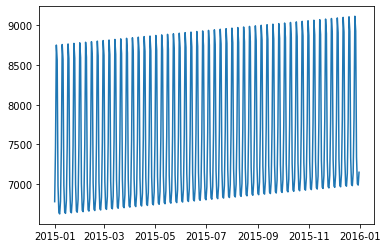

In [20]:
plt.plot(AR_foods_predict)

In [21]:
mean_absolute_error(foods_date, AR_foods_predict)

1060.360943794082

In [32]:
AR_foods_test = AutoReg(foods_date_test, lags=0, seasonal=True, trend="t")
AR_foods_test_fit = AR_foods_test.fit()

/home/harada/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [34]:
AR_foods_test_predict = AR_foods_test_fit.predict(0, len(foods_date_test)-1)
AR_foods_test_predict

2016-01-01     8711.046440
2016-01-02    11060.517028
2016-01-03    10047.752322
2016-01-04     7821.558243
2016-01-05     7677.183243
                  ...     
2016-04-20     8414.254257
2016-04-21     8506.754257
2016-04-22     9727.188854
2016-04-23    12076.659443
2016-04-24    11063.894737
Freq: D, Length: 115, dtype: float64

In [38]:
mean_absolute_error(foods_date_test, AR_foods_test_predict)

1045.4496331942391

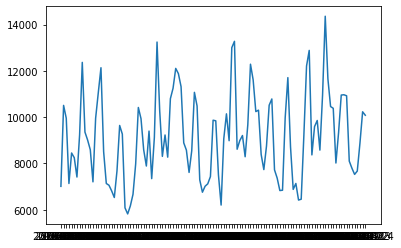

In [36]:
plt.plot(foods_date_test)

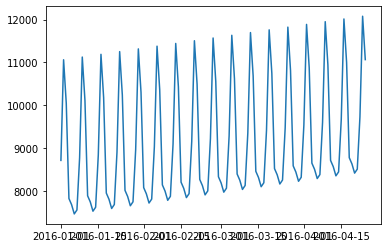

In [37]:
plt.plot(AR_foods_test_predict)

### Модель авторегрессии для категории hobbies

In [39]:
AR_hobbies = AutoReg(hobbies_date, lags=0, seasonal=True)
AR_hobbies_fit = AR_hobbies.fit()

/home/harada/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [40]:
AR_hobbies_predict = AR_hobbies_fit.predict(0, 364)
AR_hobbies_predict

2015-01-01     806.320755
2015-01-02    1013.134615
2015-01-03    1151.230769
2015-01-04     948.153846
2015-01-05     786.673077
                 ...     
2015-12-27     948.153846
2015-12-28     786.673077
2015-12-29     783.000000
2015-12-30     817.230769
2015-12-31     806.320755
Freq: D, Length: 365, dtype: float64

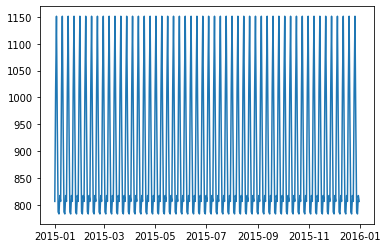

In [41]:
plt.plot(AR_hobbies_predict)

In [42]:
mean_absolute_error(hobbies_date, AR_hobbies_predict)

99.16354255721018

In [43]:
AR_hobbies_test = AutoReg(hobbies_date_test, lags=0, seasonal=True)
AR_hobbies_test_fit = AR_hobbies_test.fit()

/home/harada/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [45]:
AR_hobbies_test_predict = AR_hobbies_test_fit.predict(0, len(hobbies_date_test)-1)
AR_hobbies_test_predict

2016-01-01    1033.176471
2016-01-02    1317.647059
2016-01-03     970.352941
2016-01-04     801.812500
2016-01-05     763.562500
                 ...     
2016-04-20     818.750000
2016-04-21     837.812500
2016-04-22    1033.176471
2016-04-23    1317.647059
2016-04-24     970.352941
Freq: D, Length: 115, dtype: float64

In [46]:
mean_absolute_error(hobbies_date_test, AR_hobbies_test_predict)

85.95390025575453

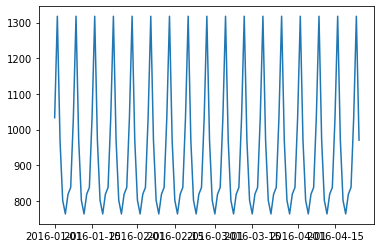

In [157]:
plt.plot(AR_hobbies_test_predict)

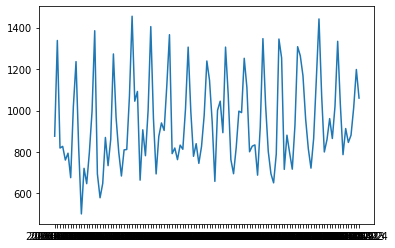

In [158]:
plt.plot(hobbies_date_test)

### Модель авторегрессии для категории household

In [47]:
AR_household = AutoReg(household_date, lags=0, seasonal=True)
AR_household_fit = AR_household.fit()

/home/harada/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [48]:
AR_household_predict = AR_household_fit.predict(0, 364)
AR_household_predict

2015-01-01    2173.641509
2015-01-02    2653.634615
2015-01-03    3066.057692
2015-01-04    2683.826923
2015-01-05    2146.923077
                 ...     
2015-12-27    2683.826923
2015-12-28    2146.923077
2015-12-29    2049.288462
2015-12-30    2089.673077
2015-12-31    2173.641509
Freq: D, Length: 365, dtype: float64

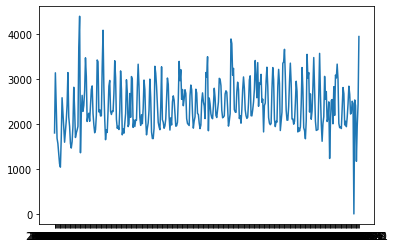

In [49]:
plt.plot(household_date)

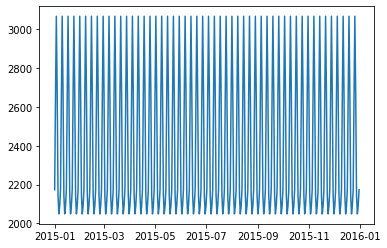

In [50]:
plt.plot(AR_household_predict)

In [164]:
mean_absolute_error(household_date, AR_household_predict)

275.3673539177287

In [51]:
AR_household_test = AutoReg(household_date_test, lags=0, seasonal=True)
AR_household_test_fit = AR_household_test.fit()

/home/harada/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [52]:
AR_household_test_predict = AR_household_test_fit.predict(0, len(household_date_test)-1)
AR_household_test_predict

2016-01-01    2935.529412
2016-01-02    3556.882353
2016-01-03    3057.352941
2016-01-04    2394.812500
2016-01-05    2194.437500
                 ...     
2016-04-20    2309.937500
2016-04-21    2424.062500
2016-04-22    2935.529412
2016-04-23    3556.882353
2016-04-24    3057.352941
Freq: D, Length: 115, dtype: float64

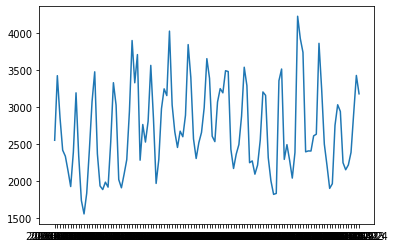

In [53]:
plt.plot(household_date_test)

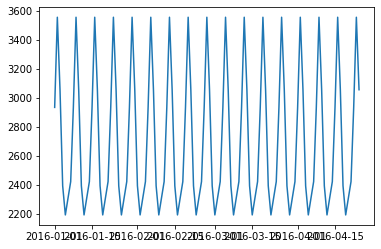

In [54]:
plt.plot(AR_household_test_predict)

In [56]:
mean_absolute_error(household_date_test, AR_household_test_predict)

275.5000639386189